DATA VISUALIZATION

In [165]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm
import os

In [45]:
data_action = pd.read_csv('TCS_stock_action.csv')
data = pd.read_csv('TCS_stock_history.csv')
data_info = pd.read_csv('TCS_stock_info.csv')

display(data_action.head())
display(data.head())
display(data_info.head())


,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


,zip,400001
0,sector,Technology
1,fullTimeEmployees,509058
2,longBusinessSummary,Tata Consultancy Services Limited provides inf...
3,city,Mumbai
4,phone,91 22 6778 9999


In [47]:
print("data_action:")
print("Shape:", data_action.shape)
print("Data types:\n", data_action.dtypes)
print("Missing values:\n", data_action.isnull().sum())
print("Summary statistics:\n", data_action.describe(include='all'))
print("Value counts:\n", data_action['Date'].value_counts())
print("-" * 20)


data_action:
Shape: (70, 3)
Data types:
 Date             object
Dividends       float64
Stock Splits    float64
dtype: object
Missing values:
 Date            0
Dividends       0
Stock Splits    0
dtype: int64
Summary statistics:
               Date  Dividends  Stock Splits
count           70  70.000000     70.000000
unique          70        NaN           NaN
top     2004-10-28        NaN           NaN
freq             1        NaN           NaN
mean           NaN   4.560714      0.085714
std            NaN   6.284794      0.407995
min            NaN   0.375000      0.000000
25%            NaN   1.000000      0.000000
50%            NaN   2.500000      0.000000
75%            NaN   5.000000      0.000000
max            NaN  40.000000      2.000000
Value counts:
 Date
2004-10-28    1
2015-10-21    1
2017-01-23    1
2016-10-24    1
2016-07-25    1
             ..
2012-01-25    1
2012-06-07    1
2012-07-23    1
2012-10-31    1
2021-07-15    1
Name: count, Length: 70, dtype: int64
------

In [49]:
print("\ndata:")
print("Shape:", data.shape)
print("Data types:\n", data.dtypes)
print("Missing values:\n", data.isnull().sum())
print("Summary statistics:\n", data.describe(include='all'))
print("Value counts for Date:\n", data['Date'].value_counts().head())

#data analysis
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    print(f"\nDistribution of {col}:\n", data[col].describe())

print("-" * 20)



data:
Shape: (4463, 8)
Data types:
 Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
Missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Summary statistics:
               Date         Open         High          Low        Close  \
count         4463  4463.000000  4463.000000  4463.000000  4463.000000   
unique        4463          NaN          NaN          NaN          NaN   
top     2002-08-12          NaN          NaN          NaN          NaN   
freq             1          NaN          NaN          NaN          NaN   
mean           NaN   866.936239   876.675013   856.653850   866.537398   
std            NaN   829.905368   838.267104   821.233477   829.611313   
min            NaN    24.146938    27.102587

In [51]:
print("\ndata_info:")
print("Shape:", data_info.shape)
print("Data types:\n", data_info.dtypes)
print("Missing values:\n", data_info.isnull().sum())

print("Value counts:\n", data_info['zip'].value_counts())
print("-" * 20)



data_info:
Shape: (150, 2)
Data types:
 zip       object
400001    object
dtype: object
Missing values:
 zip        0
400001    42
dtype: int64
Value counts:
 zip
sector                    1
pegRatio                  1
forwardPE                 1
lastCapGain               1
shortPercentOfFloat       1
                         ..
messageBoardId            1
market                    1
annualHoldingsTurnover    1
enterpriseToRevenue       1
logo_url                  1
Name: count, Length: 150, dtype: int64
--------------------


In [55]:
data['Date'] = pd.to_datetime(data['Date'])
data_action['Date'] = pd.to_datetime(data_action['Date'])



DATA ANALYSIS

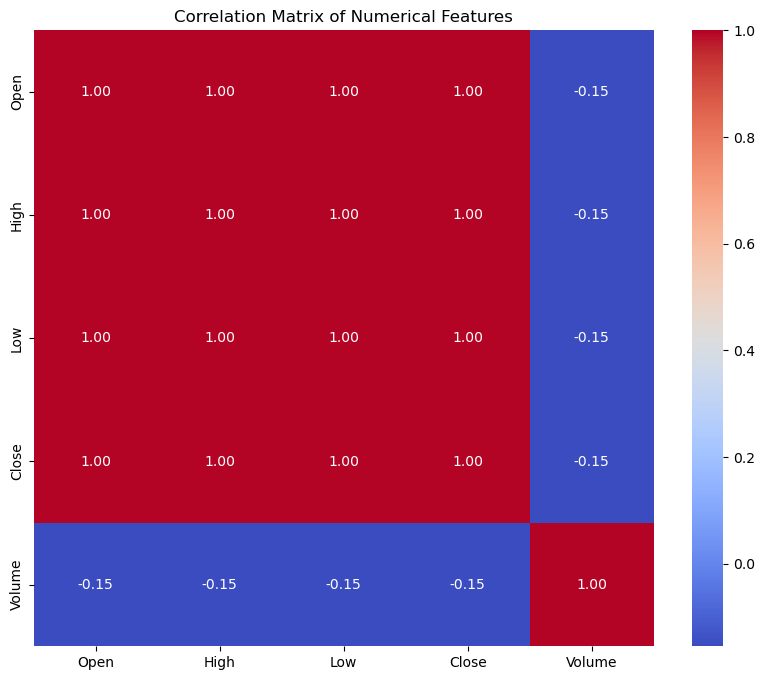

In [61]:
# Correlation Analysis

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

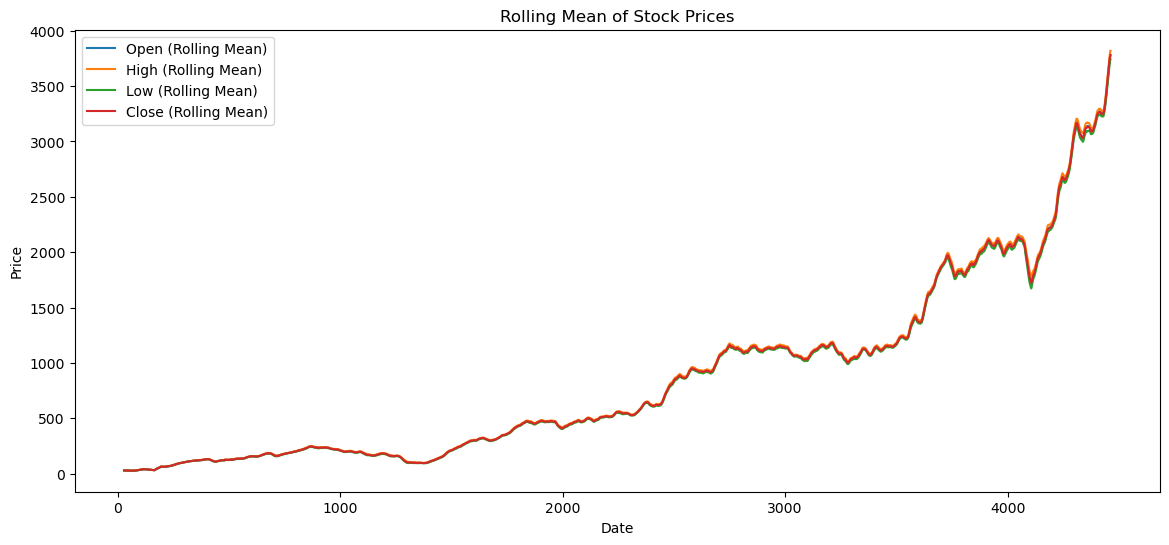

In [63]:
# Time Series Analysis: Rolling Statistics and Trend Analysis

plt.figure(figsize=(14, 6))
for col in ['Open', 'High', 'Low', 'Close']:
    data[col].rolling(window=30).mean().plot(label=f'{col} (Rolling Mean)')
plt.title('Rolling Mean of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

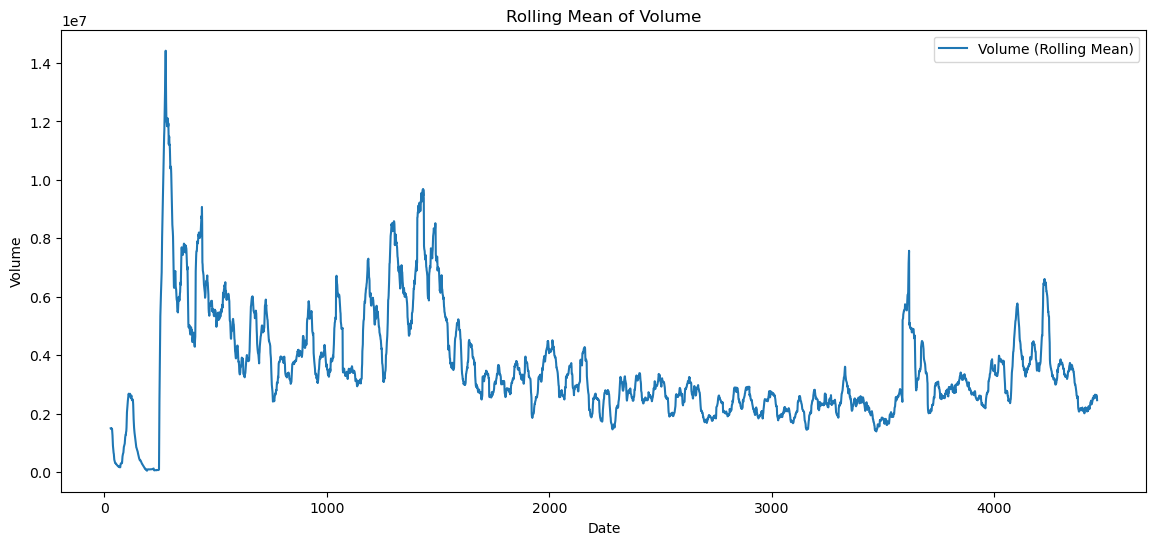

In [65]:
plt.figure(figsize=(14, 6))
data['Volume'].rolling(window=30).mean().plot(label='Volume (Rolling Mean)')
plt.title('Rolling Mean of Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [67]:
# Merge history and action
merged_data = pd.merge(data, data_action, on='Date', how='left')
display(merged_data.head())


,Date,Open,High,Low,Close,Volume,Dividends_x,Stock Splits_x,Dividends_y,Stock Splits_y
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,NaN,NaN
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,NaN,NaN
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,NaN,NaN
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,NaN,NaN


In [73]:
print(merged_data.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends_x', 'Stock Splits_x', 'Dividends_y', 'Stock Splits_y']


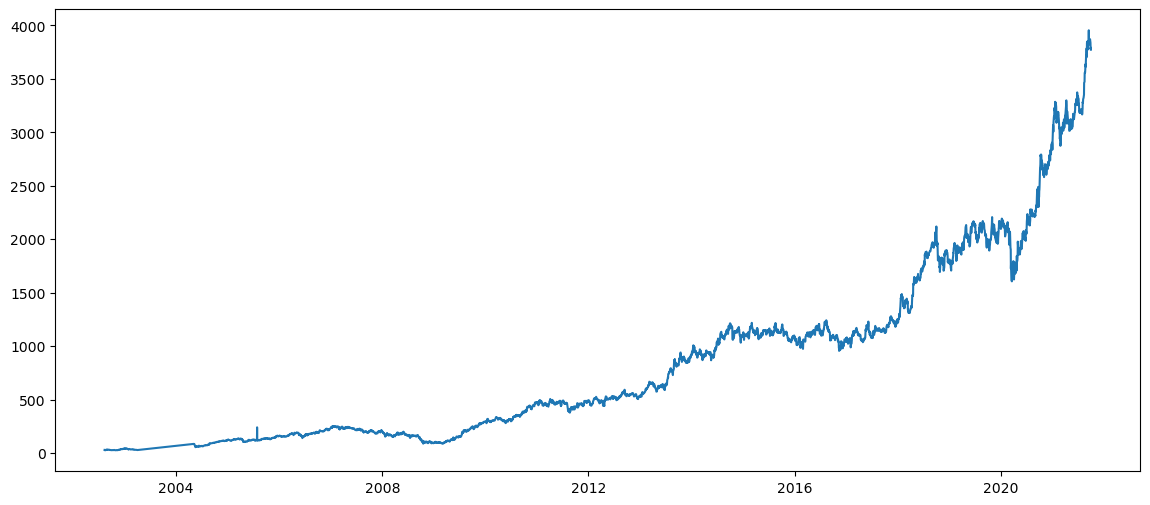

In [75]:
plt.figure(figsize=(14, 6))

plt.plot(merged_data['Date'], merged_data['Close'], label='Closing Price')




In [87]:
# Filter rows where dividends were issued
dividend_data = merged_data[merged_data['Dividends_x'] > 0]


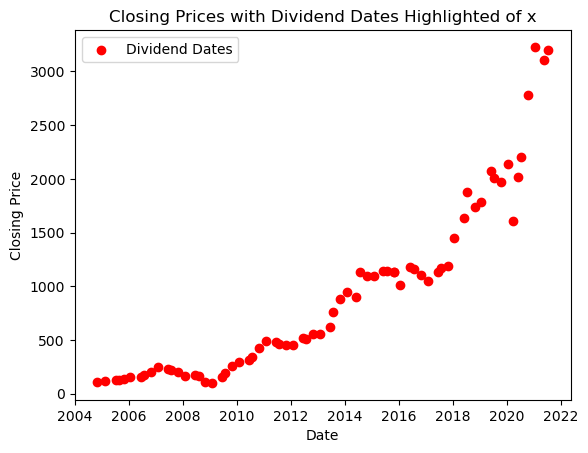

In [95]:
plt.scatter(dividend_data['Date'], dividend_data['Close'], color='red', label='Dividend Dates')
plt.title('Closing Prices with Dividend Dates Highlighted of x')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

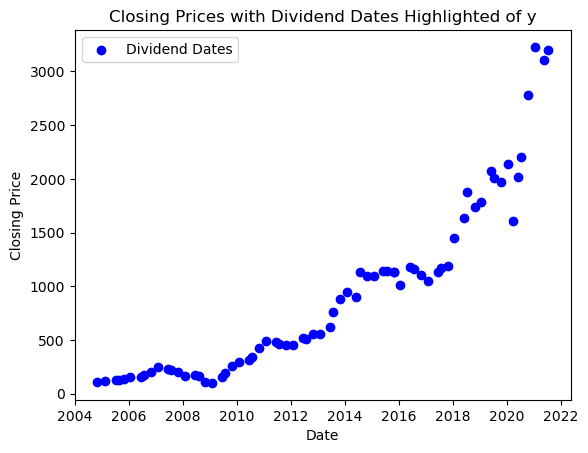

In [93]:
dividend_data = merged_data[merged_data['Dividends_y'] > 0]
plt.scatter(dividend_data['Date'], dividend_data['Close'], color='blue', label='Dividend Dates')
plt.title('Closing Prices with Dividend Dates Highlighted of y')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [101]:
print(data_info)

                     zip                                             400001
0                 sector                                         Technology
1      fullTimeEmployees                                             509058
2    longBusinessSummary  Tata Consultancy Services Limited provides inf...
3                   city                                             Mumbai
4                  phone                                    91 22 6778 9999
..                   ...                                                ...
145        dividendYield                                             0.0105
146              bidSize                                                  0
147              dayHigh                                               3805
148   regularMarketPrice                                             3773.2
149             logo_url                  https://logo.clearbit.com/tcs.com

[150 rows x 2 columns]


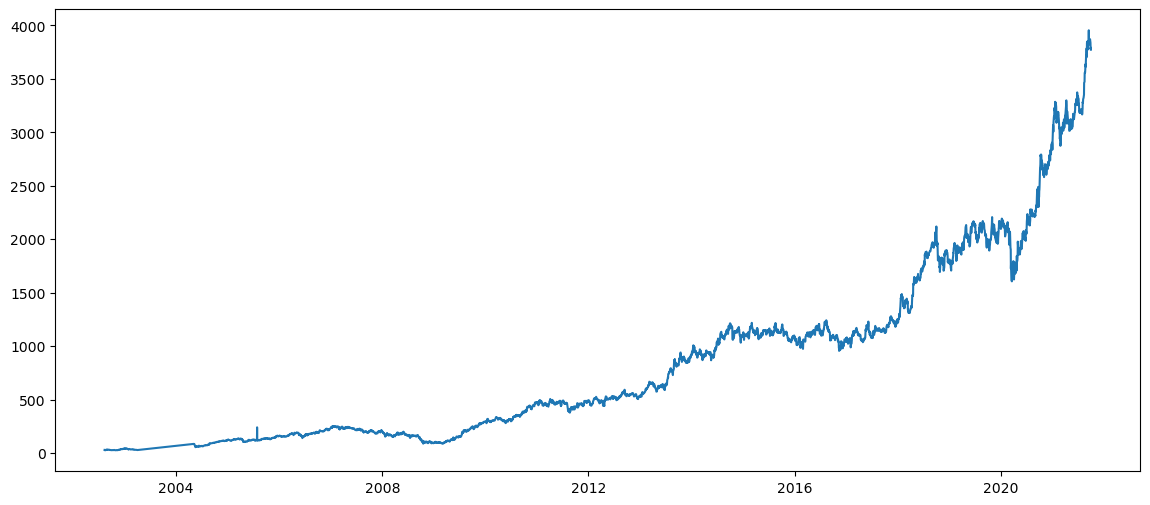

In [103]:
# Renameing columns 
merged_data = merged_data.rename(columns={'Dividends_x': 'Dividends', 'Stock Splits_x': 'Stock Splits'})

# relationship between stock price movements and corporate actions
plt.figure(figsize=(14, 6))
plt.plot(merged_data['Date'], merged_data['Close'], label='Closing Price')



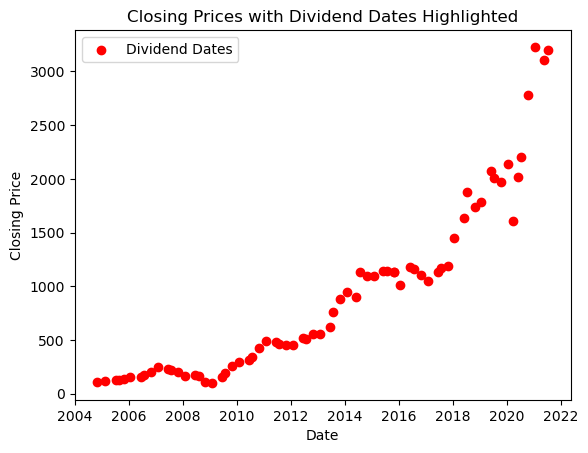

In [107]:
#Check if 'Dividends' exists and is numeric before plotting.
if 'Dividends' in merged_data.columns and pd.api.types.is_numeric_dtype(merged_data['Dividends']):
    plt.scatter(merged_data[merged_data['Dividends'] > 0]['Date'], merged_data[merged_data['Dividends'] > 0]['Close'], color='red', label='Dividend Dates')
else:
    print("Warning: 'Dividends' column not found or not numeric, cannot plot dividend dates.")

plt.title('Closing Prices with Dividend Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [109]:
#Check data types and handling issues
print(data_info.dtypes)
if 'fullTimeEmployees' in data_info.columns and pd.api.types.is_numeric_dtype(data_info['fullTimeEmployees']):
    # Example: Correlation between employee count and average closing price.
    avg_closing_price = data['Close'].mean()
    print(f"Average closing price: {avg_closing_price}")
    print(f"Number of full time employees: {data_info['fullTimeEmployees'][0]}")
else:
    print("Warning: 'fullTimeEmployees' column not found or not numeric, cannot calculate correlation.")

zip       object
400001    object
dtype: object


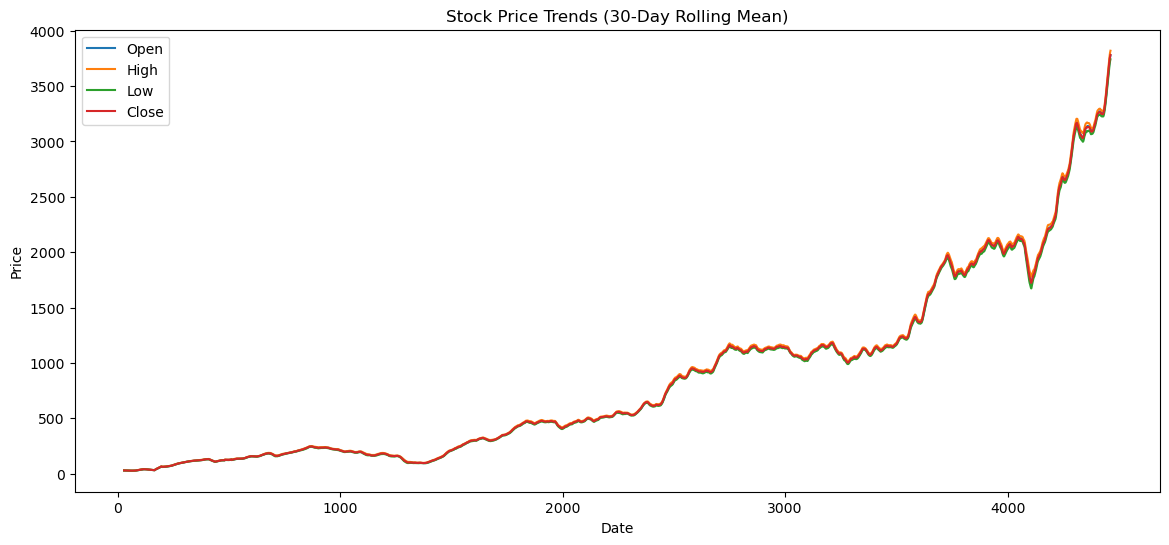

In [111]:
# 1. Stock Price Trends
plt.figure(figsize=(14, 6))
for col in ['Open', 'High', 'Low', 'Close']:
    data[col].rolling(window=30).mean().plot(label=col)
plt.title('Stock Price Trends (30-Day Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

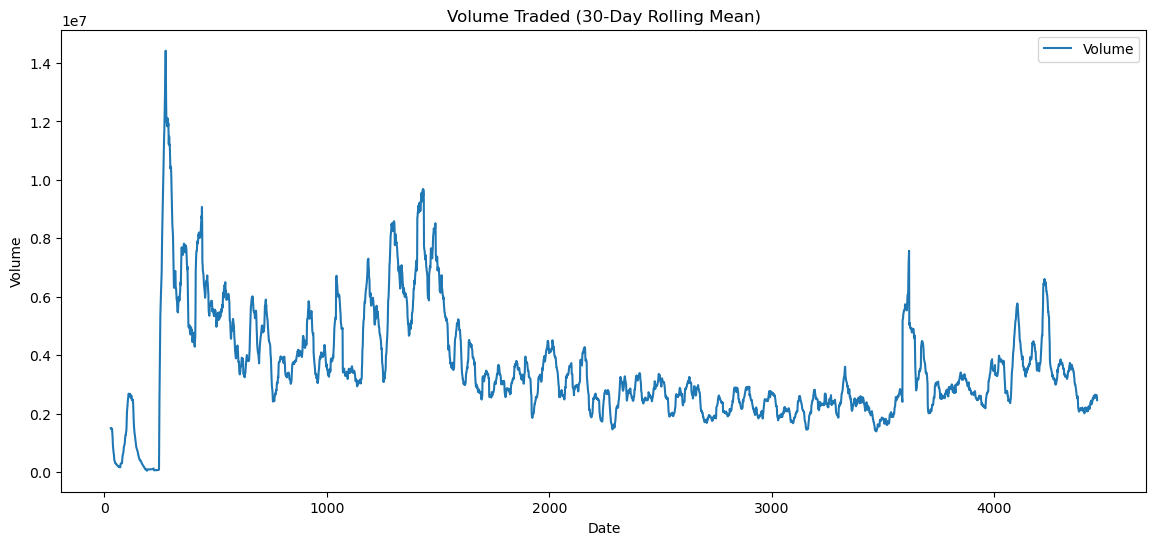

In [113]:
plt.figure(figsize=(14, 6))
data['Volume'].rolling(window=30).mean().plot(label='Volume')
plt.title('Volume Traded (30-Day Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

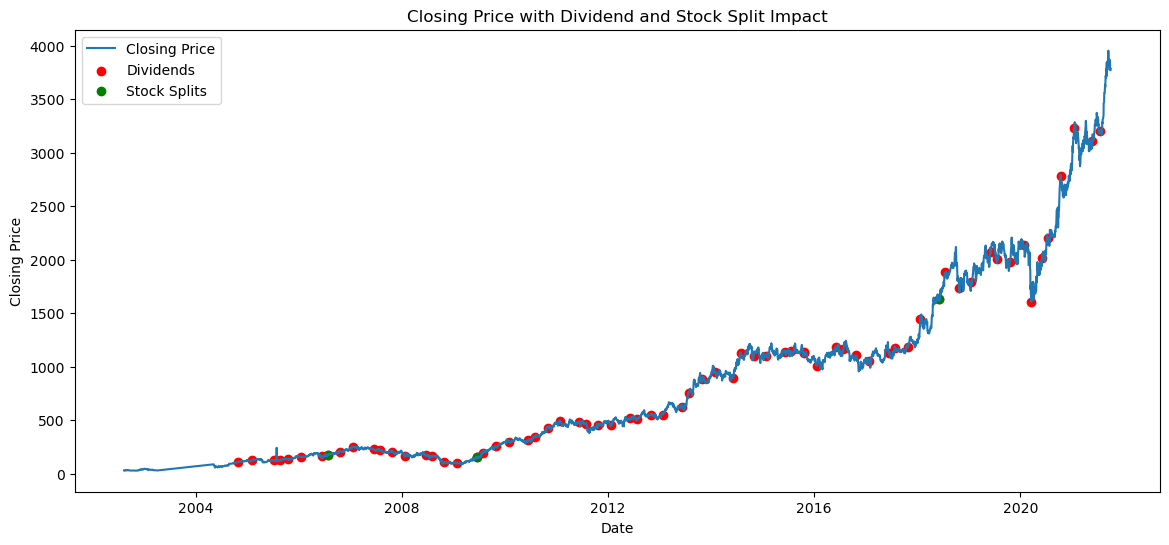

In [115]:
#2. Dividend and Stock Split Impact
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.scatter(data[data['Dividends'] > 0]['Date'], data[data['Dividends'] > 0]['Close'], color='red', label='Dividends')
plt.scatter(data[data['Stock Splits'] > 0]['Date'], data[data['Stock Splits'] > 0]['Close'], color='green', label='Stock Splits')
plt.title('Closing Price with Dividend and Stock Split Impact')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


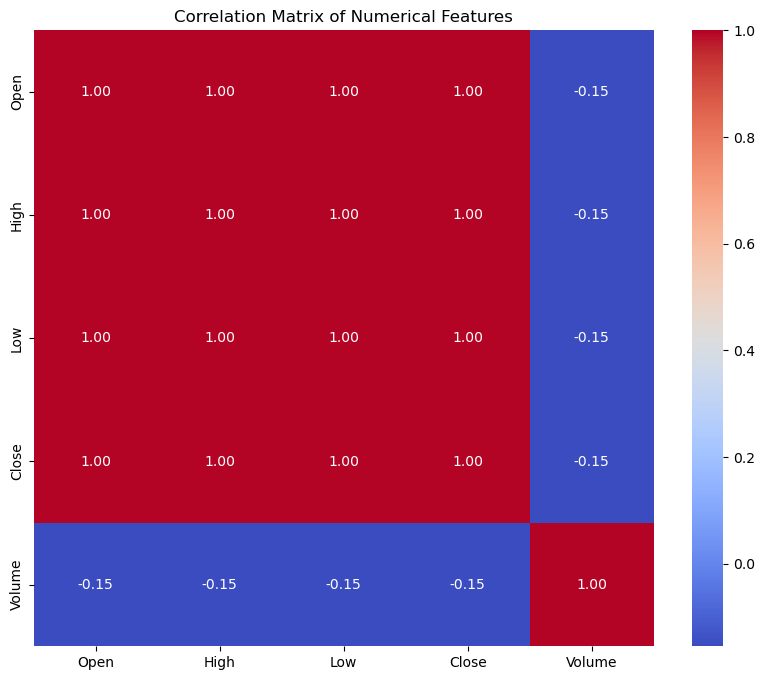

In [117]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


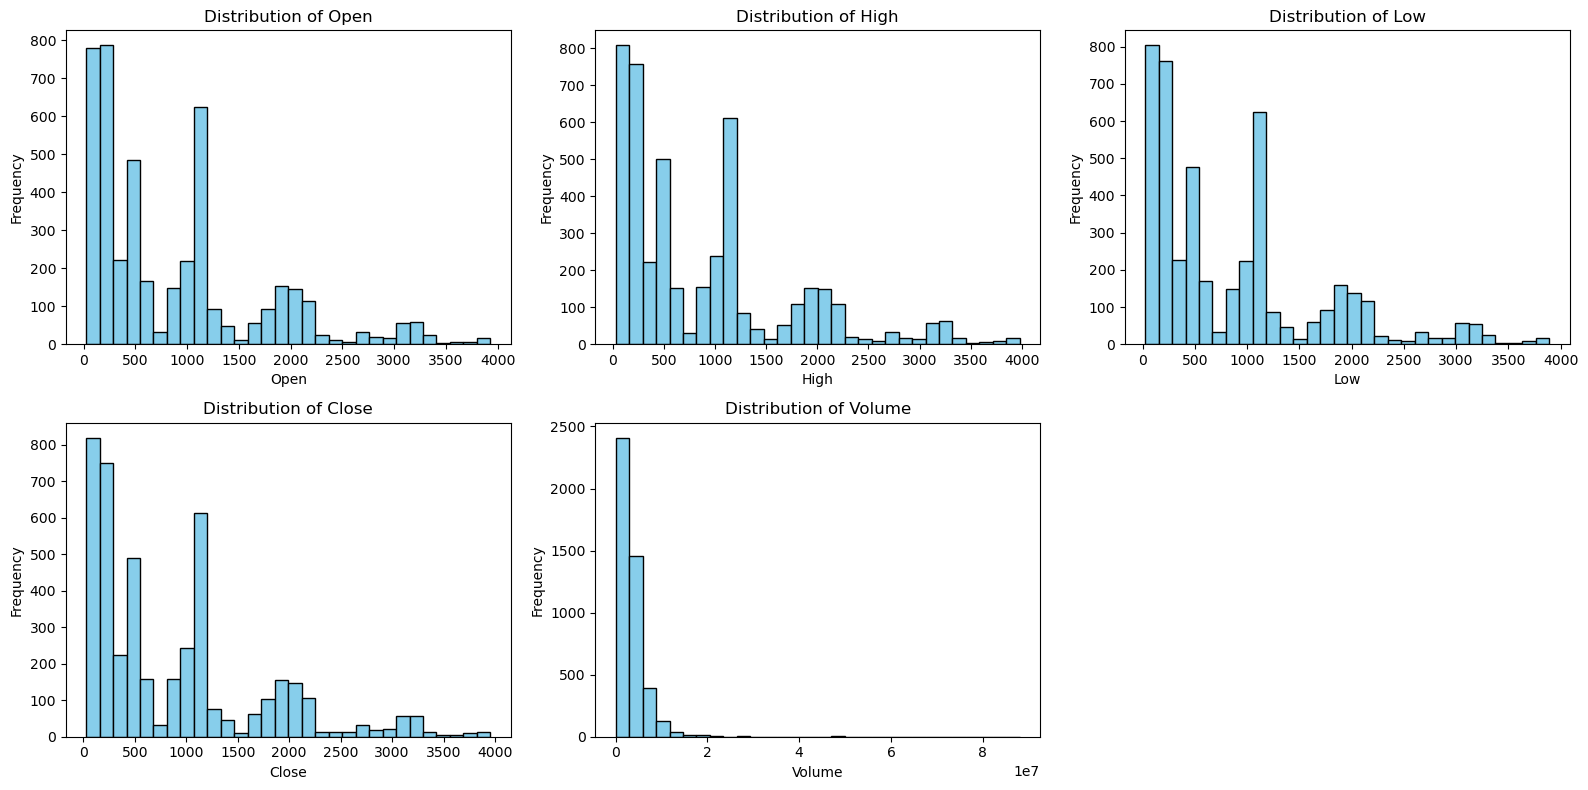

In [119]:
# 4. Distributions
plt.figure(figsize=(16, 8))
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Volume']):
    plt.subplot(2, 3, i + 1)
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

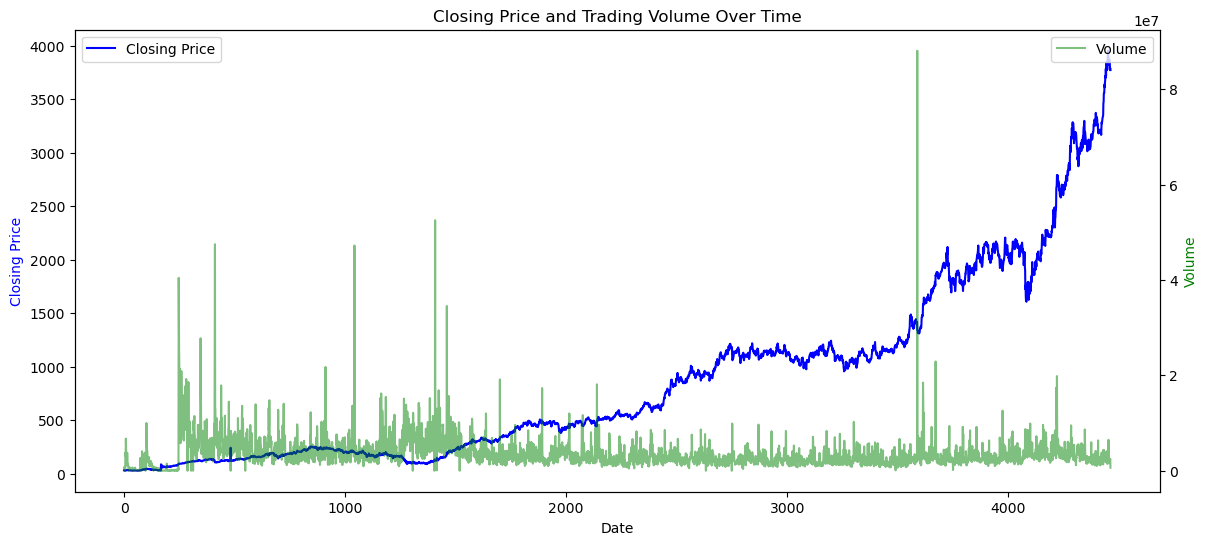

In [121]:
# 5. Combined Visualization (Closing price and Volume)
plt.figure(figsize=(14, 6))
ax1 = plt.gca()  # Get current axes
ax2 = ax1.twinx()
data['Close'].plot(ax=ax1, color='blue', label='Closing Price')
data['Volume'].plot(ax=ax2, color='green', label='Volume', alpha=0.5) # Adjust alpha for visibility
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax2.set_ylabel('Volume', color='green')
plt.title('Closing Price and Trading Volume Over Time')
ax1.legend(loc='upper left') #Position the first legend
ax2.legend(loc='upper right') #Position the second legend
plt.show()

In [123]:
"""High Correlation among Stock Prices
Volume Outliers
Dividend Impact on Price
fullTimeEmployees' Data Issue"""

"High Correlation among Stock Prices\nVolume Outliers\nDividend Impact on Price\nfullTimeEmployees' Data Issue"

In [125]:
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


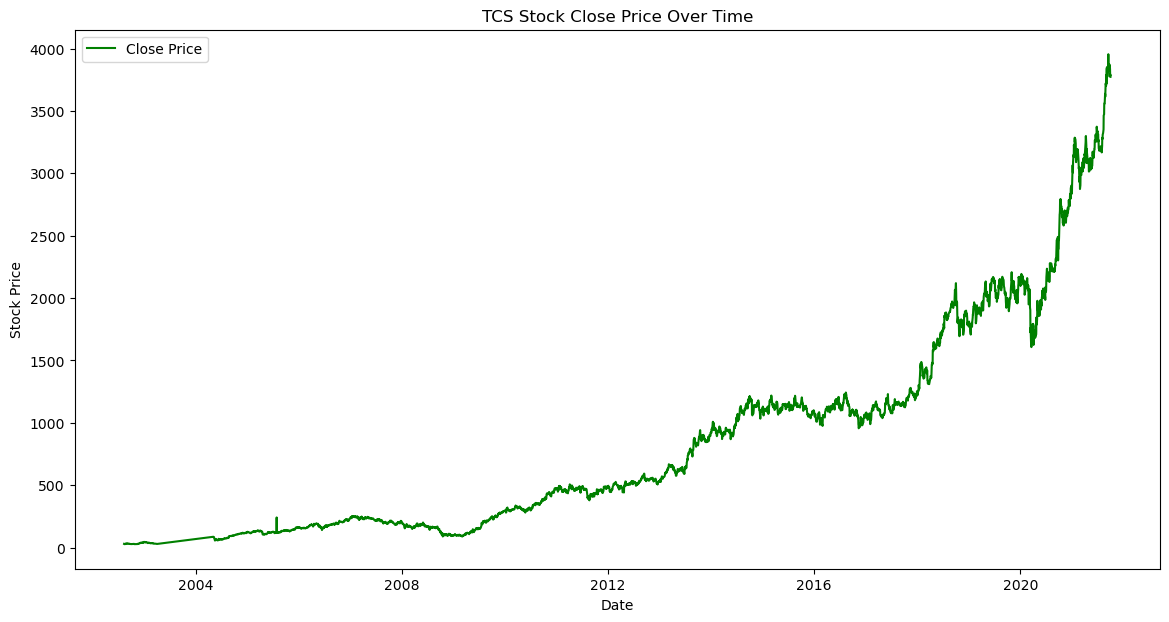

In [129]:
# Plotting Close price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='green',label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

In [131]:
# Calculating 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

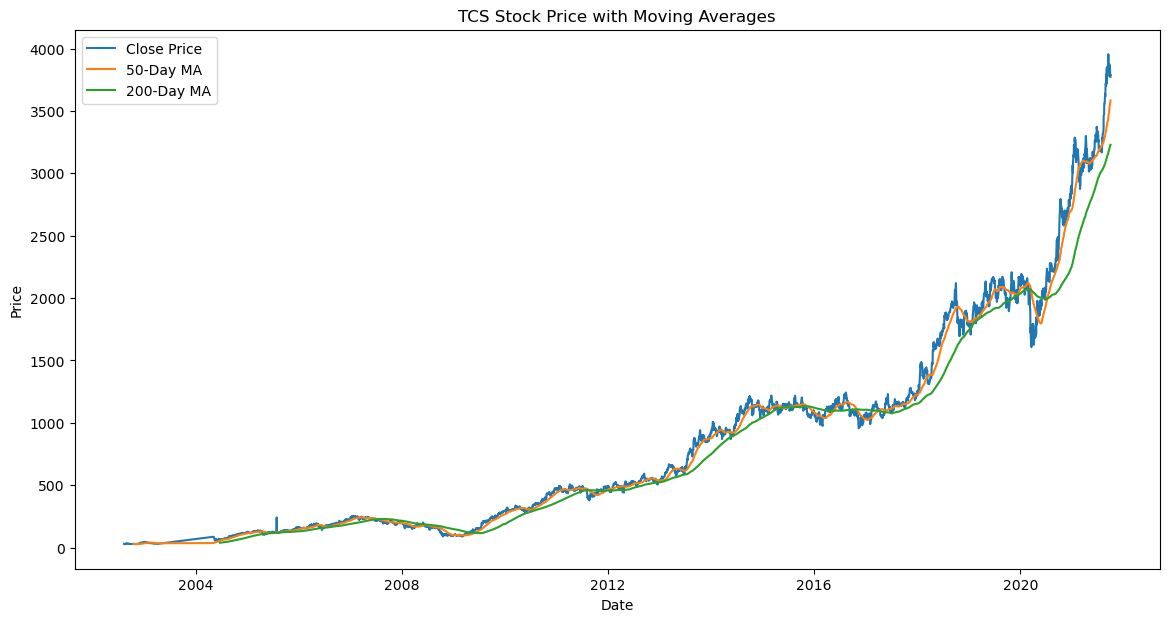

In [133]:
# Plot with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.plot(data['Date'], data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

In [135]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek

In [137]:

data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True) 

In [139]:
# Feature selection
X = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close','Day_of_Week', 'Month']]
y = data['Close']

In [141]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [143]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [145]:
# Predictions
y_pred = model.predict(X_test)

In [147]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39.04992998566473
R-Squared Score: 0.9999438356582186


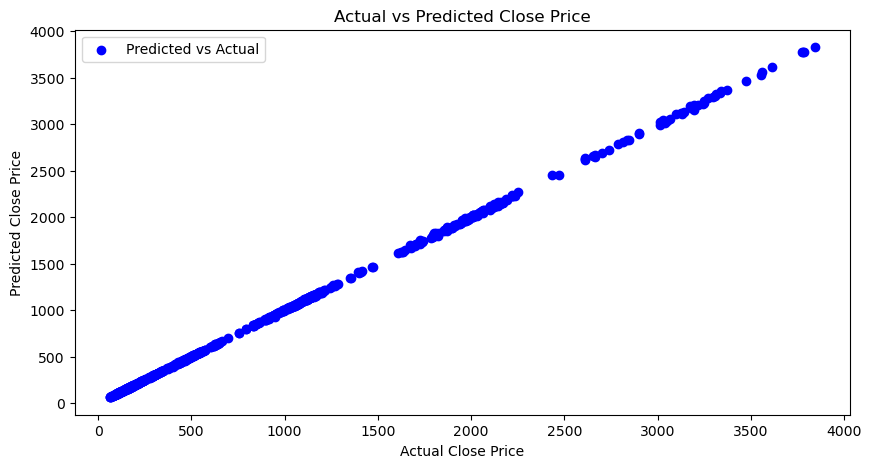

In [149]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [158]:
import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)

In [169]:


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [240]:
print(data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'MA50', 'MA200', 'Year', 'Month', 'Day', 'Day_of_Week',
       'Prev_Close', '30-Day Moving Avg', 'Short_MA', 'Long_MA', 'Signal',
       'Daily_Price_Change', 'Moving_Avg_Close'],
      dtype='object')


In [252]:

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4264 entries, 2004-06-21 to 2021-09-30
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                4264 non-null   float64
 1   High                4264 non-null   float64
 2   Low                 4264 non-null   float64
 3   Close               4264 non-null   float64
 4   Volume              4264 non-null   int64  
 5   Dividends           4264 non-null   float64
 6   Stock Splits        4264 non-null   float64
 7   MA50                4264 non-null   float64
 8   MA200               4264 non-null   float64
 9   Year                4264 non-null   int32  
 10  Month               4264 non-null   int32  
 11  Day                 4264 non-null   int32  
 12  Day_of_Week         4264 non-null   int32  
 13  Prev_Close          4264 non-null   float64
 14  30-Day Moving Avg   4235 non-null   float64
 15  Short_MA            4260 non-null   f

In [242]:
data.set_index('Date', inplace=True)

In [179]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
data.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Year,Month,Day,Day_of_Week,Prev_Close
count,4264,4264.000000,4264.000000,4264.000000,4264.000000,4.264000e+03,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000,4264.000000
mean,2013-02-01 09:45:55.722326528,905.599844,915.747017,894.886097,905.194542,3.659627e+06,0.074871,0.001407,884.114760,827.939710,2012.587477,6.530957,15.798311,1.992026,904.325160
min,2004-06-21 00:00:00,58.573539,64.131611,58.043755,62.681683,0.000000e+00,0.000000,0.000000,53.539858,38.361673,2004.000000,1.000000,1.000000,0.000000,62.681683
25%,2008-09-23 18:00:00,207.184796,210.288883,203.499755,206.532475,1.939590e+06,0.000000,0.000000,201.593277,192.689310,2008.000000,4.000000,8.000000,1.000000,206.257469
50%,2013-01-31 12:00:00,575.692327,583.616846,571.807539,575.650360,2.844132e+06,0.000000,0.000000,552.379172,530.090287,2013.000000,7.000000,16.000000,2.000000,575.356354
75%,2017-06-05 06:00:00,1166.164771,1179.365029,1153.324126,1166.532288,4.363679e+06,0.000000,0.000000,1146.773688,1125.963538,2017.000000,9.000000,23.000000,3.000000,1166.312744
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000,3584.287983,3227.919528,2021.000000,12.000000,31.000000,4.000000,3954.550049
std,NaN,829.066863,837.400194,820.432816,828.765807,3.285622e+06,0.987550,0.053037,801.073264,738.556791,5.018459,3.413140,8.776161,1.412199,827.700215


In [181]:
corel=data.corr()
corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Year,Month,Day,Day_of_Week,Prev_Close
Date,1.000000,0.905950,0.906191,0.905818,0.906053,-0.268938,0.060886,-0.008529,0.912443,0.924093,0.998379,-0.021818,-0.000786,0.001224,0.906223
Open,0.905950,1.000000,0.999883,0.999887,0.999776,-0.198837,0.057655,-0.008115,0.996948,0.989297,0.903899,-0.009586,-0.000442,0.000601,0.999935
High,0.906191,0.999883,1.000000,0.999860,0.999910,-0.196315,0.057962,-0.007995,0.997019,0.989460,0.904173,-0.010224,0.000025,0.000428,0.999846
Low,0.905818,0.999887,0.999860,1.000000,0.999896,-0.200474,0.057832,-0.008018,0.996792,0.989098,0.903744,-0.009185,-0.000204,0.000269,0.999838
Close,0.906053,0.999776,0.999910,0.999896,1.000000,-0.198311,0.058102,-0.008033,0.996858,0.989252,0.904005,-0.009692,0.000146,0.000202,0.999729
Volume,-0.268938,-0.198837,-0.196315,-0.200474,-0.198311,1.000000,-0.013343,0.003861,-0.202287,-0.208166,-0.267088,-0.023877,0.055815,0.048135,-0.198644
Dividends,0.060886,0.057655,0.057962,0.057832,0.058102,-0.013343,1.000000,0.142424,0.059121,0.061458,0.060757,-0.001680,0.012632,-0.003745,0.057681
Stock Splits,-0.008529,-0.008115,-0.007995,-0.008018,-0.008033,0.003861,0.142424,1.000000,-0.009252,-0.010607,-0.008394,-0.004128,0.027824,0.012677,-0.007971
MA50,0.912443,0.996948,0.997019,0.996792,0.996858,-0.202287,0.059121,-0.009252,1.000000,0.994216,0.910383,-0.009882,0.001638,0.000842,0.997014
MA200,0.924093,0.989297,0.989460,0.989098,0.989252,-0.208166,0.061458,-0.010607,0.994216,1.000000,0.922456,-0.017941,0.002603,0.001014,0.989404


In [183]:
#Correlation of features with the target variable (Close Price)
correlation_with_close =data.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999910
Low             0.999896
Open            0.999776
Prev_Close      0.999729
MA50            0.996858
MA200           0.989252
Date            0.906053
Year            0.904005
Dividends       0.058102
Day_of_Week     0.000202
Day             0.000146
Stock Splits   -0.008033
Month          -0.009692
Volume         -0.198311
Name: Close, dtype: float64


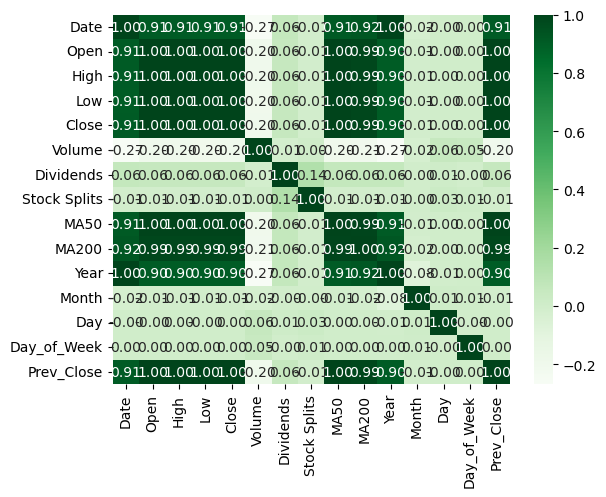

In [185]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

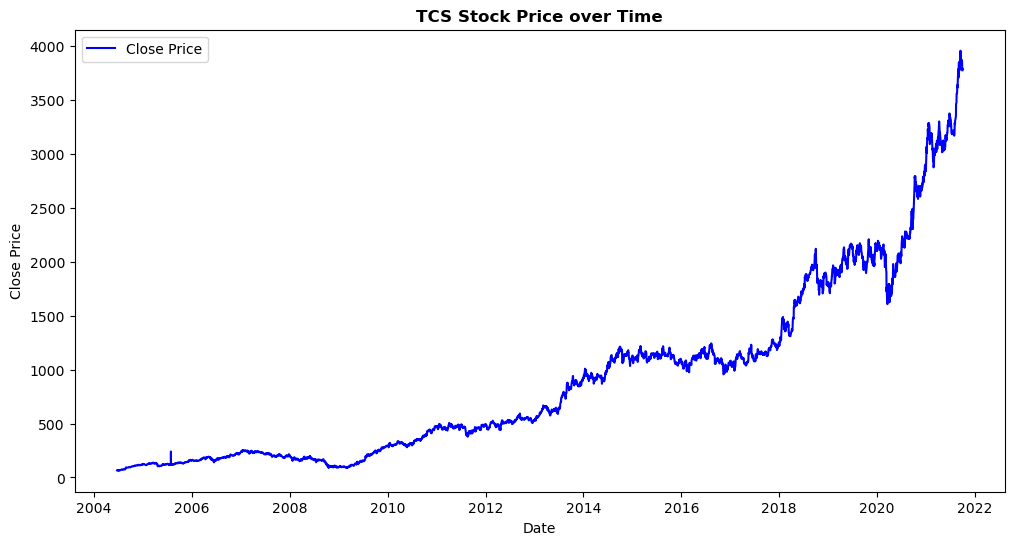

In [189]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price',color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

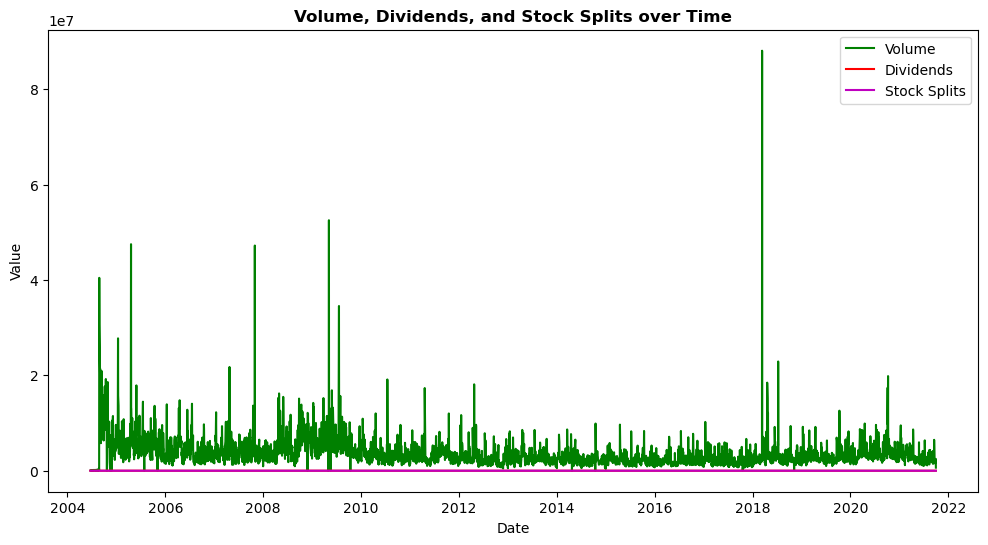

In [191]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='g')
plt.plot(data['Date'], data['Dividends'], label='Dividends',color='r')
plt.plot(data['Date'], data['Stock Splits'], label='Stock Splits',color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

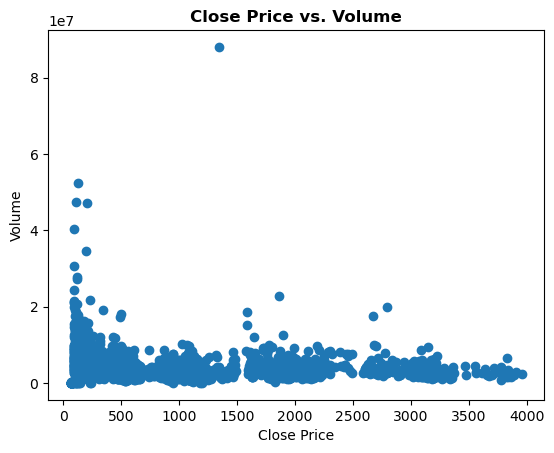

In [193]:
plt.scatter(data['Close'], data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

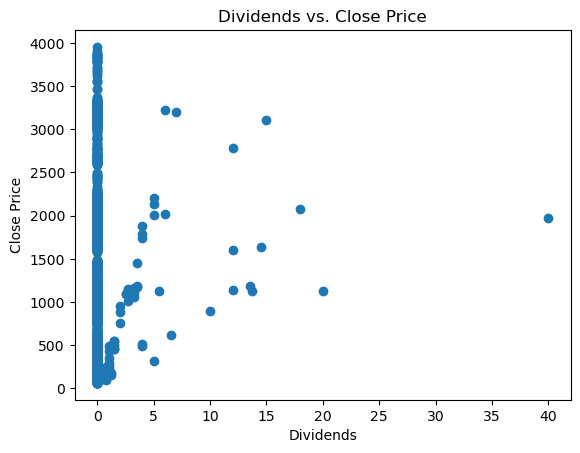

In [195]:
# Dividends vs. Close Price
plt.scatter(data['Dividends'], data['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

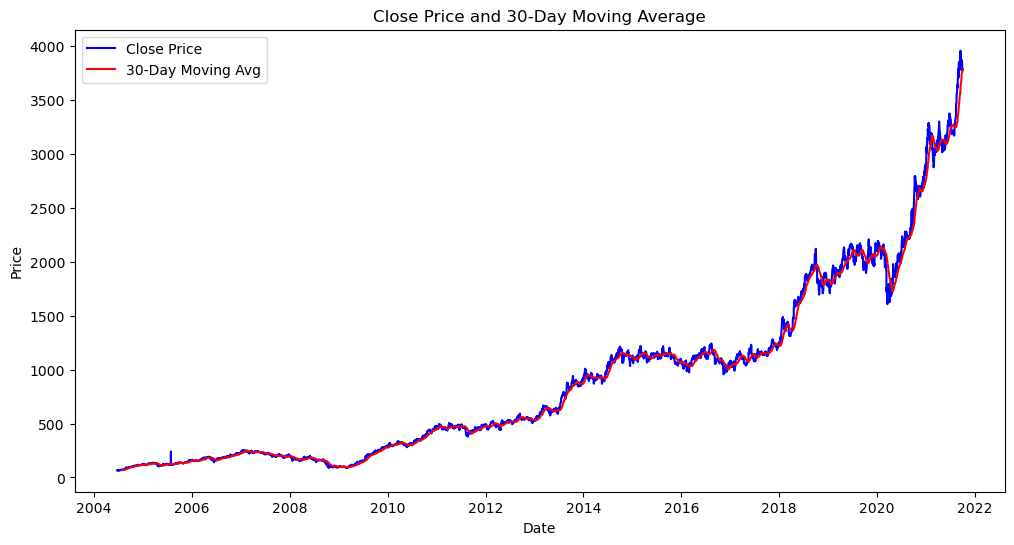

In [199]:
data['30-Day Moving Avg'] = data['Close'].rolling(window=30).mean()

# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price',color='b')
plt.plot(data['Date'], data['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

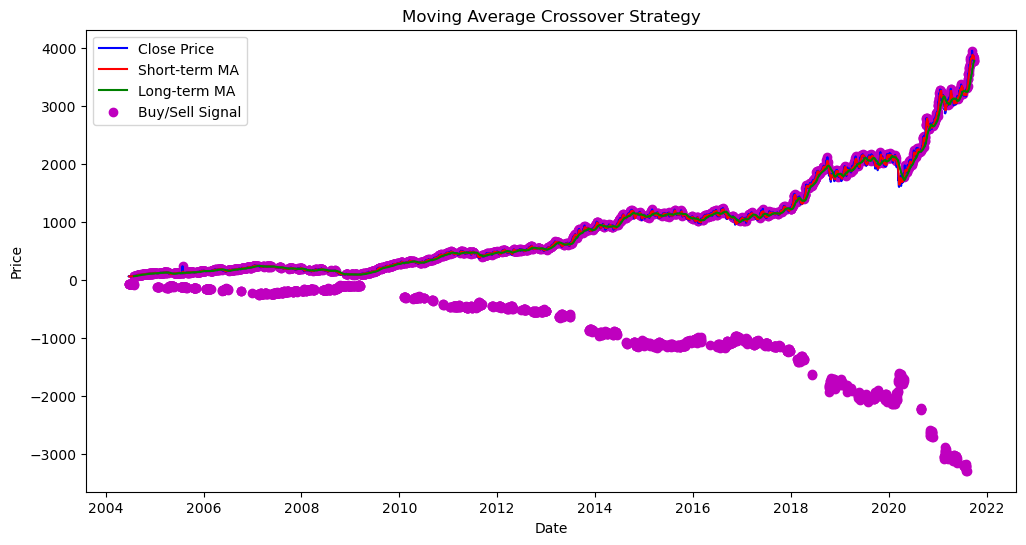

In [203]:
data['Short_MA'] = data['Close'].rolling(window=5).mean()
data['Long_MA'] = data['Close'].rolling(window=30).mean()

# Creating a trading signals based on moving average crossovers
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1, -1)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price',color='b')
plt.plot(data['Date'], data['Short_MA'], label='Short-term MA', color='r')
plt.plot(data['Date'], data['Long_MA'], label='Long-term MA',color='g')
plt.scatter(data['Date'], data['Close'] * data['Signal'],label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

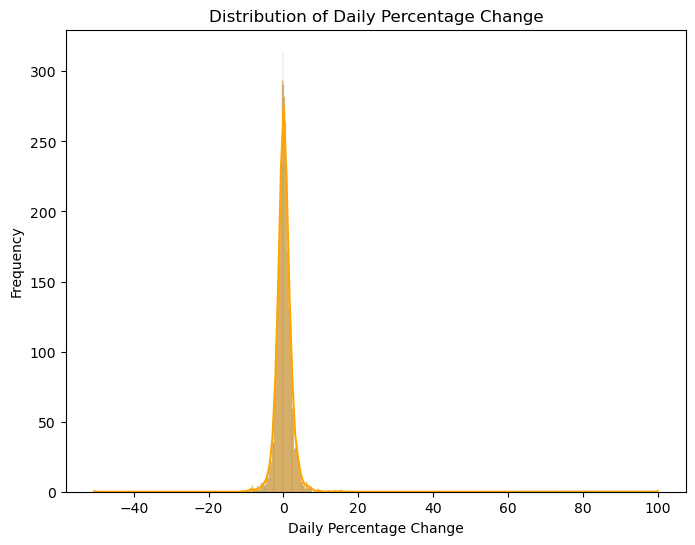

In [205]:
data['Daily_Price_Change'] = data['Close'].pct_change() * 100

# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(data['Daily_Price_Change'].dropna(), kde=True,color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [207]:
data['Moving_Avg_Close'] = data['Close'].rolling(window=7).mean()

In [211]:
data.shape

(4264, 21)

In [213]:
# Prepare the data for LSTM

X_train = data['Close'].values.reshape(-1, 1)
y_train = data['Close'].shift(-1).dropna().values

In [215]:
# Normalization of data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(data) * test_ratio)
test_data = data[-test_size:]

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

#Building a LSTM Model

model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

epochs = 30
batch_size = 15

# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|████████████████████████████████████████| 30/30 [00:00<00:00, 13054.17it/s]


In [219]:
lstm_predictions = model.predict(X_test_lstm).flatten()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [221]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

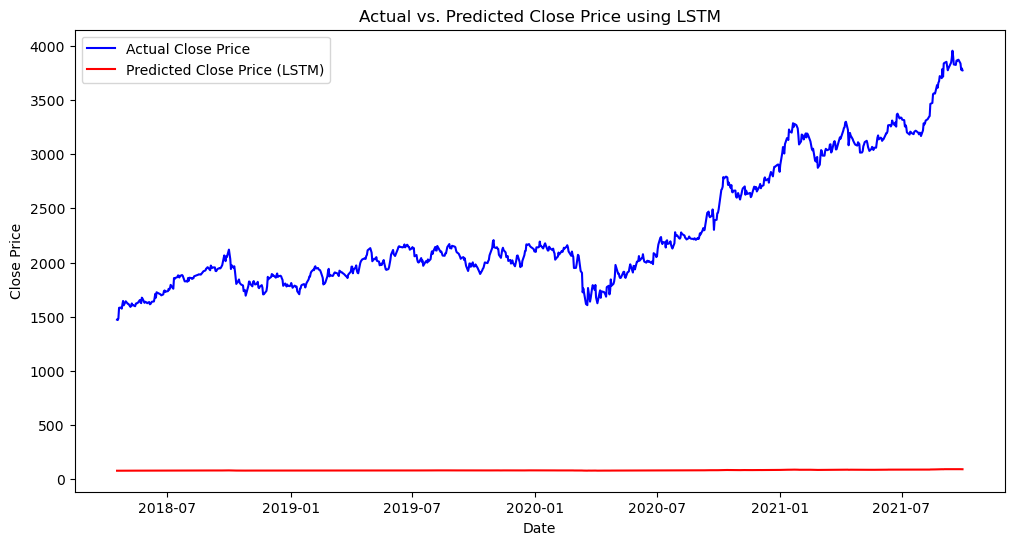

In [223]:
#Visualization of LSTM predictions

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

In [225]:
lstm_mae = mean_absolute_error(test_data['Close'],lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 2215.581674978767


In [227]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

In [229]:
date_index = test_data.index[-len(lstm_predictions):]
predictions_df = pd.DataFrame({'Date': date_index,'Predicted_Close': lstm_predictions.flatten()})

In [231]:
predictions_df.to_csv('predictions.csv', index=False)